In [33]:
! pip install mlxtend

In [2]:
! kaggle datasets download -d sohier/calcofi


  0%|          | 0.00/50.4M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.4M [00:00<00:18, 2.75MB/s]
  8%|7         | 4.00M/50.4M [00:00<00:04, 10.2MB/s]
 12%|#1        | 6.00M/50.4M [00:00<00:04, 10.6MB/s]
 16%|#5        | 8.00M/50.4M [00:00<00:03, 11.8MB/s]
 22%|##1       | 11.0M/50.4M [00:00<00:02, 14.8MB/s]
 26%|##5       | 13.0M/50.4M [00:01<00:02, 15.0MB/s]
 30%|##9       | 15.0M/50.4M [00:01<00:02, 14.4MB/s]
 34%|###3      | 17.0M/50.4M [00:01<00:02, 14.6MB/s]
 38%|###7      | 19.0M/50.4M [00:01<00:02, 15.9MB/s]
 42%|####1     | 21.0M/50.4M [00:01<00:01, 15.5MB/s]
 46%|####5     | 23.0M/50.4M [00:01<00:02, 14.4MB/s]
 50%|####9     | 25.0M/50.4M [00:01<00:01, 15.4MB/s]
 54%|#####3    | 27.0M/50.4M [00:02<00:01, 15.3MB/s]
 58%|#####7    | 29.0M/50.4M [00:02<00:01, 13.8MB/s]
 61%|######1   | 31.0M/50.4M [00:02<00:01, 15.3MB/s]
 65%|######5   | 33.0M/50.4M [00:02<00:01, 14.0MB/s]
 69%|######9   | 35.0M/50.4M [00:02<00:01, 14.8MB/s]
 73%|#######3  | 37.0M/50.4M [00:02<00:00, 15.4MB/s]
 

In [4]:
import zipfile
with zipfile.ZipFile("calcofi.zip","r") as zip_ref:
    zip_ref.extractall("dataset")

In [150]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import operator
from mlxtend.preprocessing import minmax_scaling

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
df_bottle = pd.read_csv('./dataset/bottle.csv')
df_bottle

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [17]:
df_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [19]:
df_bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [20]:
df_bottle['Salinity'] = df_bottle['Salnty']
df_bottle['Temp'] = df_bottle['T_degC']

In [21]:
df = pd.DataFrame(df_bottle[['Salinity', 'Temp']])

In [22]:
df.isnull().sum()

Salinity    47354
Temp        10963
dtype: int64

In [25]:
df = df.dropna()

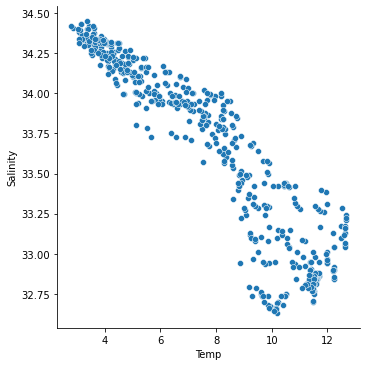

In [89]:
palette = sns.color_palette("rocket_r")

sns.relplot(data=df, x='Temp', y='Salinity', palette= palette)

In [90]:
df = df[:][:500]

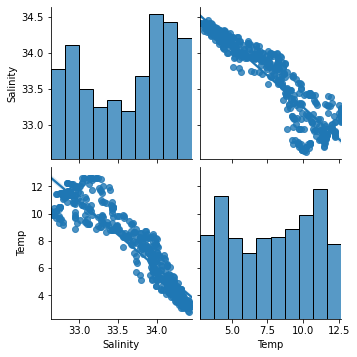

In [91]:
sns.pairplot(df, kind="reg")

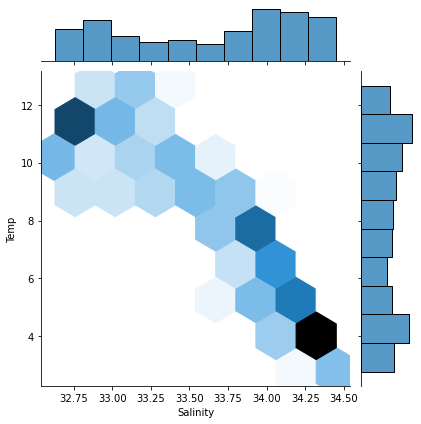

In [92]:
sns.jointplot(data=df,x='Salinity', y='Temp', kind="hex")

## Checking for Normalization

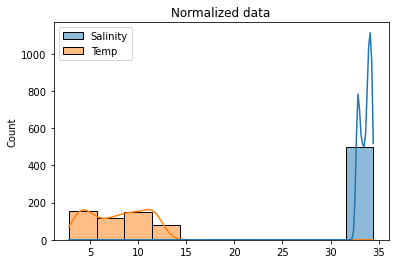

In [93]:
ax = sns.histplot(df, kde=True)
ax.set_title("Normalized data")
plt.show()

In [94]:
idx_salt = df.Salinity > 0

# get only positive pledges (using their indexes)
positive_salt = df.Salinity.loc[idx_salt]

# normalize the pledges (w/ Box-Cox)
normalized_salt = pd.Series(stats.boxcox(positive_salt)[0], 
                               name='Salinity', index=positive_salt.index)

In [95]:
idx_Temp = df.Temp > 0

# get only positive pledges (using their indexes)
positive_temp = df.Temp.loc[idx_salt]

# normalize the pledges (w/ Box-Cox)
normalized_Temp = pd.Series(stats.boxcox(positive_salt)[0], 
                               name='Temp', index=positive_salt.index)

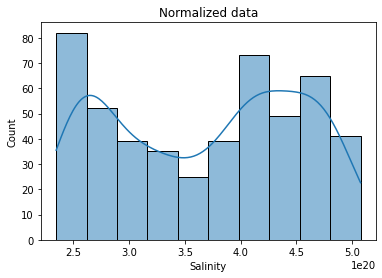

In [96]:
ax = sns.histplot(normalized_salt, kde=True)
ax.set_title("Normalized data")
plt.show()

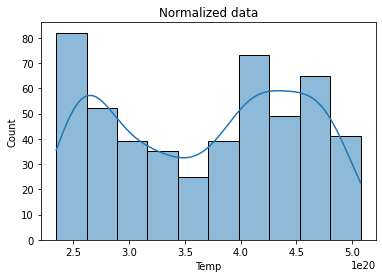

In [97]:
ax = sns.histplot(normalized_Temp, kde=True)
ax.set_title("Normalized data")
plt.show()

In [99]:
X = np.array(df['Salinity']).reshape(-1, 1)
y = np.array(df['Temp']).reshape(-1, 1)

# Modeling

> ## Spliting the Dataset

In [100]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)

In [128]:
pil_lr = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

# pil_lor = Pipeline(steps=[
#     ('scale', StandardScaler()),
#     ('model', LogisticRegression())
# ])

# pil_lr = Pipeline(steps=[
#     ('scale', StandardScaler()),
#     ('model', LinearRegression())
# ])

pil_dt = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', DecisionTreeRegressor())
])

pil_rf = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor())
])

In [191]:
pil_lr.fit(train_X, train_y)
# pil_lor.fit(train_X, train_y)
pil_dt.fit(train_X, train_y)
pil_rf.fit(train_X, train_y)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestRegressor())])

In [192]:
p_lr = pil_lr.predict(val_X)
p_dt = pil_dt.predict(val_X)
p_rf = pil_rf.predict(val_X)

In [193]:
accuracy_score_lr = pil_lr.score(val_X, val_y)
accuracy_score_dt = pil_dt.score(val_X, val_y)
accuracy_score_rf = pil_rf.score(val_X, val_y)

print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score_lr), "DecisionTree Model Accuracy Score: " + "{:.1%}".format(accuracy_score_dt), "RanodmForest Model Accuracy Score: " + "{:.1%}".format(accuracy_score_rf))

Linear Regression Model Accuracy Score: 84.7% DecisionTree Model Accuracy Score: 84.4% RanodmForest Model Accuracy Score: 87.1%


In [194]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(val_y, p_lr)));

R2 Score: 0.847


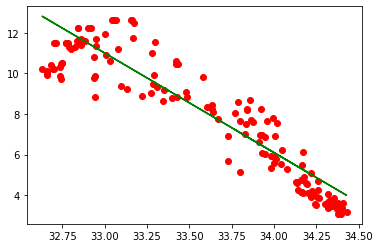

In [195]:
# Finally draw figure of Linear Regression Model

plt.scatter(val_X, val_y, color='r')
plt.plot(val_X, p_lr, color='g')
plt.show()

In [196]:
cross_val_score(pil_lr, X, y, cv=10, scoring = 'r2').mean()

0.8028086084284002

In [197]:
pil_lr.score(train_X, train_y) 

0.8487406196371179

In [198]:
np.sqrt(-cross_val_score(pil_lr, 
                train_X, 
                train_y, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

1.1218010639620626

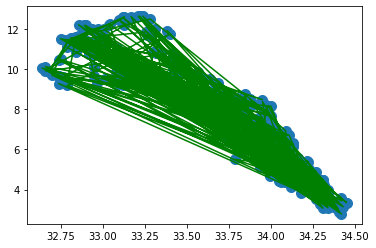

In [199]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(train_X, train_y, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(train_X, p_lr), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(train_X, train_y, color='g')
plt.show()

In [200]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(train_X)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,train_y)

polynomial_predict = linreg2.predict(transform_poly)

In [201]:
rmse = np.sqrt(mean_squared_error(train_y,polynomial_predict))
r2 = r2_score(train_y,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.82
R2 Score for Test set: 0.92


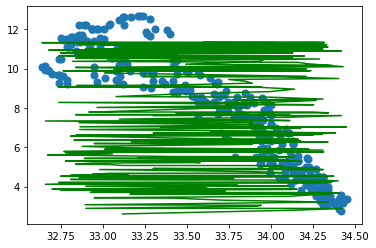

In [202]:
plt.scatter(train_X, train_y, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(train_X,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(train_X, polynomial_predict, color='g')
plt.show()

## Decision Tree

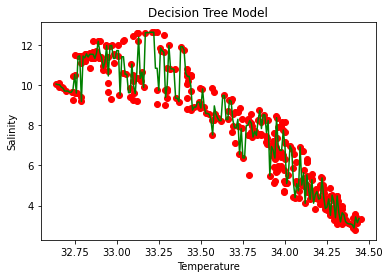

In [203]:
plt.scatter(train_X, train_y, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(train_X)),max(np.array(train_X)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,pil_dt.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [204]:
rmse = np.sqrt(mean_squared_error(train_y,p_dt))
r2 = r2_score(train_y, p_dt)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

ValueError: Found input variables with inconsistent numbers of samples: [350, 150]

## RanodmForest

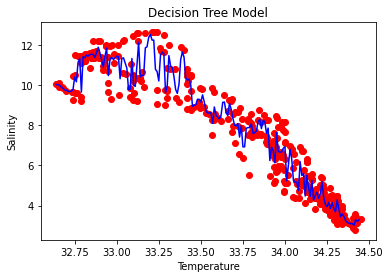

In [205]:
plt.scatter(train_X, train_y, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(train_X)),max(np.array(train_X)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,pil_rf.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()